In this notebook file, I perform the kickstart state classification. Through this, I utilize six classification algorithm: K-Nearest Neighbors, Decision Tree, Adaboost/Decision Tree, Random Forest, Adaboost/Random Forest and Nive Bayes. All the classification methods are adopted from `sklearn`. I use `sklearn` and `seaborn` for displaying overall classification performance and confusion matrix.

The classification of kickstarter state is broken to the following steps:
 1. Set-up dependencies
 2. Load data
 3. Normalize data
 4. Build evaluation data
 5. Build model
 6. Train model
 7. Evaluate
 8. Predict

## 1. Import dependencies

In [1]:
import os, inspect, sys
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# get path to current and root directories
CURR_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURR_DIR)
sys.path.insert(0, ROOT_DIR)

from kickstarter.data import Data
from kickstarter.model import KNeighbors
from kickstarter.model import CSupportVector
from kickstarter.model import DecisionTree
from kickstarter.model import RandomForest
from kickstarter.model import AdaBoost
from kickstarter.model import GaussianNaiveBayes
from kickstarter import print_confusion_matrix

/home/aidin/miniconda3/envs/kickstarter/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/aidin/miniconda3/envs/kickstarter/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Load data

In [2]:
class_names = ["Successful", "Falied"]
fname = os.path.join(ROOT_DIR, "kickstarter", "data", "ext", "data_clean.csv")
subset = None
random_state = 2018
test_ratio = 0.3

data = Data(fname=fname, random_state=random_state)
x, y = data.load(subset=subset)
print(f"# samples on kickstarter set: {x.shape[0]}")

# samples on kickstarter set: 331672


## 3. Normalize data

In [3]:
# current available options: 'min-max', 'standard', 'robust'
x = data.normalize(x, algorithm="robust")

## 4. Build Evaluation data

In [4]:
x_train, x_test, y_train, y_test = data.split(x, y,test_ratio=test_ratio)

print(f"# samples on train set: {x_train.shape[0]}")
print(f"# samples on test set: {x_test.shape[0]}")

# samples on train set: 232170
# samples on test set: 99502


## 5. Build model

In [5]:
# model = KNeighbors(n_neighbors=10) # train acc: 95.6%/test acc:94.8%

# model = DecisionTree(
#     max_depth=10,
#     random_state=random_state) # train acc:99.9% /test acc: 99.8%

# model = AdaBoost(
#     base_estimator=DecisionTree(max_depth=10),
#     random_state=random_state) # train acc:100.0%/test acc:99.8%

# model = RandomForest(
#     max_depth=10,
#     n_estimators=15,
#     max_features=5,
#     random_state=random_state) # train acc:99.9%/test acc:99.9%

# model = AdaBoost(
#     base_estimator=RandomForest(max_depth=10,
#                                 n_estimators=15,
#                                 max_features=5),
#     random_state=random_state) # train acc:100.0%/test acc:99.9%
model = GaussianNaiveBayes() # train acc:74.4 /test accuray:74.3
# model = CSupportVector(gamma=2, C=1) # train accuracy: /test accuray:


## 6. Train model

In [6]:
model.fit(x_train, y_train)

## 7. Evaluate model

In [7]:
score_train = model.score(x_train, y_train)*100
score_test = model.score(x_test, y_test)*100
print(f"Overall accuracy on train set: {score_train}")
print(f"Overall accuracy on test set: {score_test}")

Overall accuracy on train set: 74.40926907007795
Overall accuracy on test set: 74.30805410946513


## 8. Predict

In [8]:
yhat_test = model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, yhat_test)

In [9]:
# print classification detailed scores
print(classification_report(y_test, yhat_test, target_names=class_names))

             precision    recall  f1-score   support

 Successful       0.71      0.98      0.82     59315
     Falied       0.92      0.40      0.56     40187

avg / total       0.79      0.74      0.71     99502



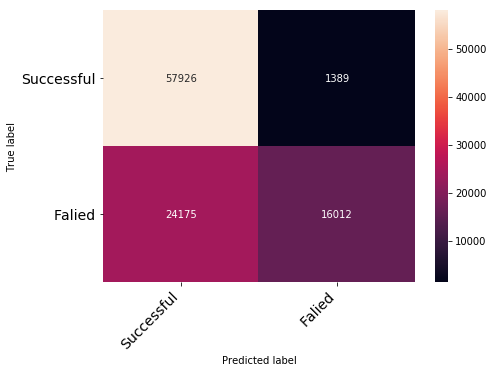

In [10]:
# print confusion matrix
_ = print_confusion_matrix(confusion_matrix=cnf_matrix,
                           class_names=class_names,
                           figsize=(7,5))